# Solution of the 2D Poisson problem using our own FEM code

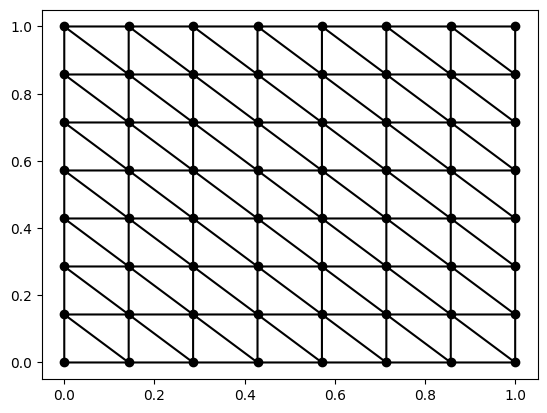

In [8]:
from import_hack import *
from methodsnm.mesh_2d import *
from methodsnm.visualize import *
mesh = StructuredRectangleMesh(7,7)
DrawMesh2D(mesh)


On the mesh, we define a finite element space:

In [9]:
from methodsnm.fes import *
fes = P1_Triangle_Space(mesh)


On the mesh, with the given finite element space, we define the variational formulation:
$$
\int_{\Omega} \nabla u \cdot \nabla v dx + \int_{\Omega} u v dx = \int_{\Omega} f v dx
$$
Replacing 
* $u \leadsto u_h = \sum_j u_j \phi_j $ and
* $v \leadsto v_h = \phi_i$
we obtain a linear system:

In [10]:
from methodsnm.forms import *
from methodsnm.formint import *
from numpy import pi, cos ,sin

left = mesh.filter_bndry_points("min",0)
right = mesh.filter_bndry_points("max",0)
bndry = left +right


import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import spsolve
from methodsnm.solver import solve_on_freedofs



def list_diff(a, b):
    """Entfernt alle Elemente aus Liste a, die in Liste b enthalten sind."""
    return [x for x in a if x not in b]

bndry = mesh.bndry_vertices  
blf = BilinearForm(fes)
c = GlobalFunction(lambda x: 1, mesh = mesh)
blf += LaplaceIntegral(c)
#blf += MassIntegral(c)
blf.assemble()
free_dofs= list_diff(mesh.vertices,bndry)

lf = LinearForm(fes)
f = GlobalFunction(lambda x: (pi**2)*(sin(pi*x[0])+sin(pi*x[1])), mesh = mesh)
lf += SourceIntegral(f)
lf.assemble()



blf.matrix

In [11]:
print(blf.matrix, "\n", lf.vector)

  (0, 0)	1.0000000065185497
  (0, 1)	-0.5000000022492016
  (0, 8)	-0.5000000023765326
  (1, 0)	-0.5000000022492016
  (1, 1)	2.0000000110169527
  (1, 2)	-0.5000000022492016
  (1, 9)	-1.000000004625734
  (2, 1)	-0.5000000022492016
  (2, 2)	2.0000000110169527
  (2, 3)	-0.5000000022492016
  (2, 10)	-1.000000004625734
  (3, 2)	-0.5000000022492016
  (3, 3)	2.0000000110169527
  (3, 4)	-0.5000000022492016
  (3, 11)	-1.000000004625734
  (4, 3)	-0.5000000022492016
  (4, 4)	2.0000000110169527
  (4, 5)	-0.5000000022492014
  (4, 12)	-1.0000000046257342
  (5, 4)	-0.5000000022492014
  (5, 5)	2.0000000110169536
  (5, 6)	-0.500000002249202
  (5, 12)	-9.71445146547012e-17
  (5, 13)	-1.0000000046257345
  (6, 5)	-0.500000002249202
  :	:
  (57, 57)	2.0000000054658376
  (57, 58)	-0.5000000013664596
  (58, 50)	-1.000000004625734
  (58, 57)	-0.5000000013664596
  (58, 58)	2.0000000054658376
  (58, 59)	-0.5000000013664596
  (59, 51)	-1.000000004625734
  (59, 58)	-0.5000000013664596
  (59, 59)	2.0000000054658376

Next, we solve the linear system. And we use a direct solver from scipy for that (for now):

In [12]:

uh = FEFunction(fes)
f = lambda x: sin(pi*x[0]) + sin(pi*x[1])
uh._set(f, bndry)
res = lf.vector - blf.matrix.dot(uh.vector)
#DrawFunction2D(uh)
from scipy.sparse.linalg import spsolve
uh.vector += solve_on_freedofs(blf.matrix,res,free_dofs)

Finally, we can visualize the solution:

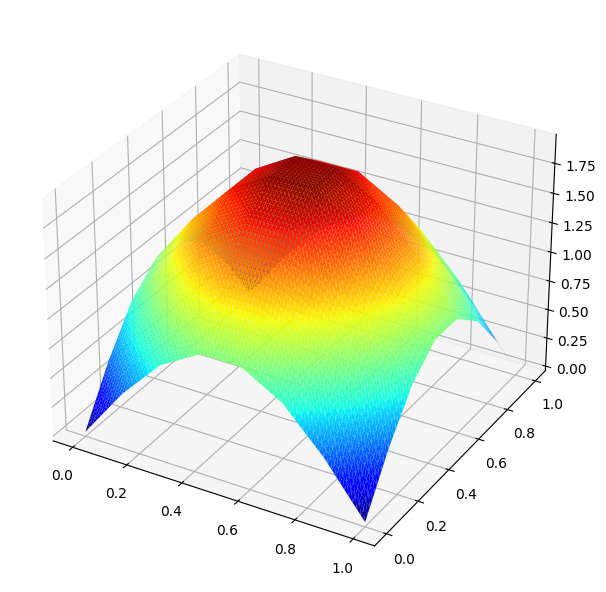

In [13]:
DrawFunction2D(uh)

This problem now contained several simplifications, that can be removed step by step:
 * qualitative evaluation only (no quantitative evaluation, no convergence study)
 * boundary conditions are natural. Different boundary conditions make it more difficult
 * 1D $\leadsto$ 2D
 * P1 (low order) discretization vs. P2 and higher order discretizations

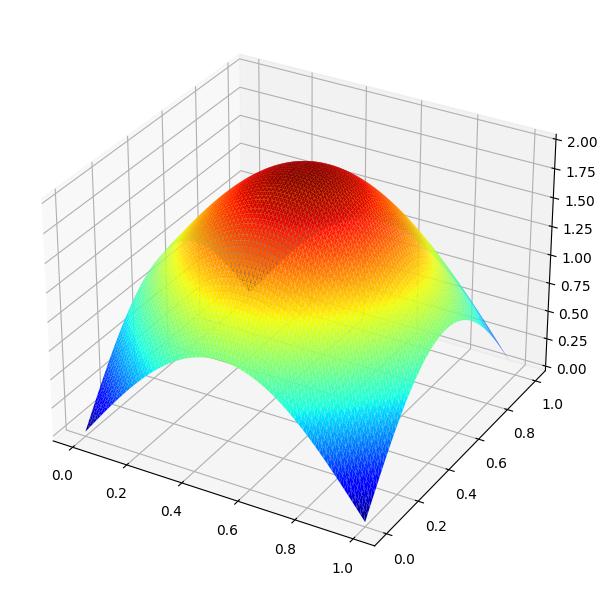

l2diff = 0.022932356068578297


In [14]:
from methodsnm.forms import compute_difference_L2

uex =  GlobalFunction(lambda x: sin(pi*x[0])+sin(pi*x[1]) , mesh = mesh)
l2diff = compute_difference_L2(uh, uex, mesh, intorder = 3)
DrawFunction2D(uex)
print("l2diff =", l2diff)

        
